# CanESM5 GMD paper Figure 6
## Summary skill diagnostics



In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import modules.basic_stats as bst
import modules.plotting_module as pltm
import modules.Taylor as taylor
import sqlite3

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
%store -r color_dict
var_names ={'psl':'psl (2D)','tas':'tas (2D)','pr':'pr (2D)','uas':'uas (2D)','ta500':'ta (2D)\n(500hPa)', 'ua500':'ua (2D)\n(500hPa)',
            'clt':'clt (2D)','gpp':'gpp (2D)','hfls':'hfls (2D)', 'hfss':'hfss (2D)','fgco2':'fgco2 (2D)',
            'tos':'tos (2D)','sos':'sos (2D)','zos':'zos (2D)','dissic':'dissic (3D)','no3':r'NO$_3$ (3D)',
            'o2':r'O$_2$ (3D)','so':'so (3D)','thetao':'thetao (3D)', 'ta':'ta (3D)','ua':'ua (3D)','va':'va (3D)','zg':'zg (3D)','tas':'tas (2D)',
            'si_march_nh':'siconc (2D)\n(NH March)','si_march_sh':'siconc (2D)\n(SH March)',
            'si_sept_nh':'siconc (2D)\n(NH Sept)','si_sept_sh':'siconc (2D)\n(SH Sept)'}

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


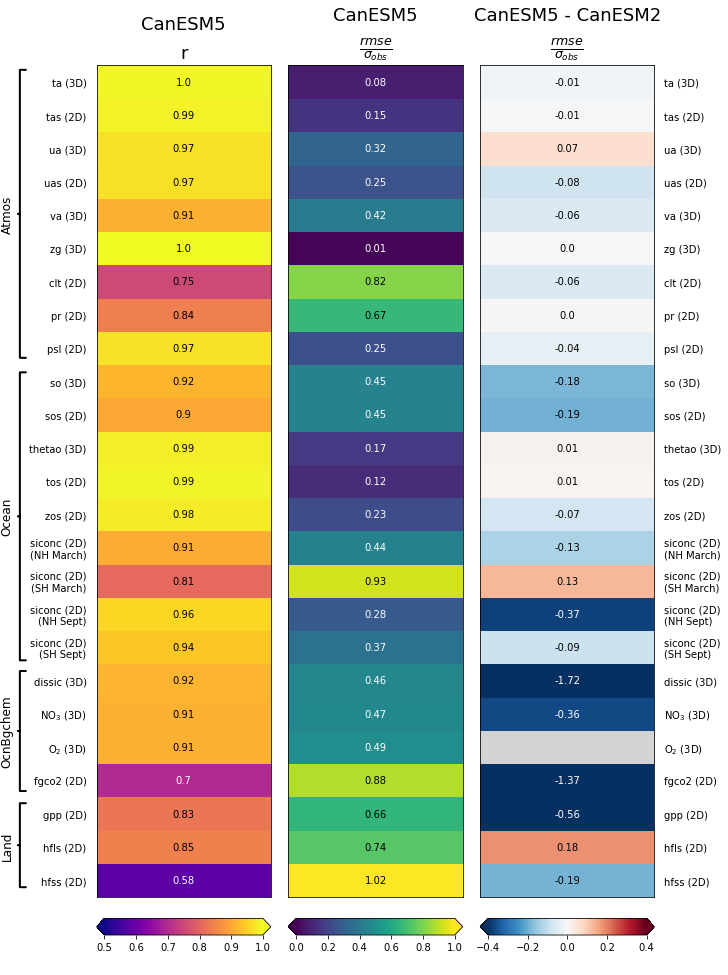

In [3]:
#heatmap of basic stats - 3 column

#get data
conn = sqlite3.connect('stats.db')
c = conn.cursor()

values = {'model1':'CanESM5', 'model2':'CanESM2'}
c.execute(('''SELECT b1.var, b1.model as CanESM5, b2.model as CanESM2, 
                     b1.corrcoeff, (b1.corrcoeff) - (b2.corrcoeff), 
                     b1.rmse/b1.obs_std, (b1.rmse/b1.obs_std)-(b2.rmse/b2.obs_std),
                     b1.model_std/b1.obs_std, (b1.model_std/b1.obs_std)-(b2.model_std/b2.obs_std)
              FROM basic_stats b1
                   LEFT JOIN basic_stats b2 
                   ON b1.var = b2.var and b2.model=:model2 and b2.xyzt IN ('TTFF','TTTF')
              WHERE
                   b1.model=:model1
                   and b1.xyzt IN ('TTFF','TTTF')
                   and b1.var IN ('psl','tas','pr','uas','clt','gpp','hfls', 'hfss','fgco2',
                                  'tos','sos','zos','dissic','no3','o2','so','thetao', 'ta','ua','va','zg',
                                  'si_march_nh','si_march_sh','si_sept_nh','si_sept_sh')
              ORDER BY 
                  CASE b1.var
                    WHEN 'ta' THEN 24
                    WHEN 'tas' THEN 23
                    WHEN 'ua' THEN 22
                    WHEN 'uas' THEN 21 
                    WHEN 'va' THEN 20
                    WHEN 'zg' THEN 19
                    WHEN 'clt' THEN 18
                    WHEN 'pr' THEN 17
                    WHEN 'psl' THEN 16                       
                    WHEN 'so' THEN 15
                    WHEN 'sos' THEN 14
                    WHEN 'thetao' THEN 13
                    WHEN 'tos' THEN 12
                    WHEN 'zos' THEN 11
                    WHEN 'si_march_nh' THEN 10
                    WHEN 'si_march_sh' THEN 9
                    WHEN 'si_sept_nh' THEN 8
                    WHEN 'si_sept_sh' THEN 7
                    WHEN 'dissic' THEN 6
                    WHEN 'no3' THEN 5
                    WHEN 'o2' THEN 4
                    WHEN 'fgco2' THEN 3
                    WHEN 'gpp' THEN 2
                    WHEN 'hfls' THEN 1
                    WHEN 'hfss' THEN 0
                  END
           '''),values) 

data = c.fetchall()
conn.close()

varslist = [var_names[row[0]] for row in data]
rs = np.array([[row[3]] for row in data],dtype=np.float)
rmses = np.array([[row[5]] for row in data],dtype=np.float)
rmse_diffs = np.array([[row[6]] for row in data],dtype=np.float)


#plotting
column_label_size = 18
title_fontsize = 18
fig = plt.figure(figsize=(10,16))
plt.subplots_adjust(wspace=0.1)  


ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1))
ax3 = plt.subplot2grid((1, 3), (0, 2))


cmap=plt.cm.plasma
cmap.set_bad(color = 'lightgrey', alpha = 1.)
sk = ax1.pcolormesh(rs,cmap=cmap, edgecolor='',vmin=0.5, vmax=1.)
pltm.add_cbar('bottom', fig, ax1, sk, extend='both', size='2%', pad=0.3)
ax1.set_xticks(np.arange(len(rs[0]))+0.5)
ax1.set_xticklabels(['r'], fontsize=column_label_size)
ax1.xaxis.tick_top()
ax1.set_yticks(np.arange(len(varslist))+0.5)
ax1.set_yticklabels(varslist)
ax1.tick_params('both',length=0,width=0,which='major')
ax1.tick_params(axis='y',pad=10)
ax1.set_title('CanESM5', fontsize=title_fontsize, pad=15)
for y in range(rs.shape[0]):
    for x in range(rs.shape[1]):
        if np.isnan(rs[y, x]):
            label = ''
        else:
            label = round(rs[y, x],2)
        color='k'
        if label <= 0.7:
            color = 'w'
        ax1.text(x + 0.5, y + 0.5, label, horizontalalignment='center', verticalalignment='center', color=color)

        
cmap2=plt.cm.viridis
cmap2.set_bad(color = 'lightgrey', alpha = 1.)
rmse = ax2.pcolormesh(rmses,cmap=cmap2, edgecolor='',vmin=0., vmax=1.)
pltm.add_cbar('bottom', fig, ax2, rmse, extend='both',  size='2%', pad=0.3)
ax2.set_xticks(np.arange(len(rmses[0]))+0.5)
ax2.set_xticklabels([r'$\frac{rmse}{\sigma_{obs}}$'], fontsize=column_label_size)
ax2.xaxis.tick_top()
ax2.set_yticks(np.arange(len(varslist))+0.5)
ax2.set_yticklabels([])
ax2.yaxis.tick_right()
ax2.tick_params('both',length=0,width=0,which='major')
ax2.tick_params(axis='y',pad=10)
ax2.set_title('CanESM5', fontsize=title_fontsize, pad=15)
for y in range(rmses.shape[0]):
    for x in range(rmses.shape[1]):
        if np.isnan(rmses[y, x]):
            label = ''
        else:
            label = round(rmses[y, x],2)
        color='k'
        if label <= 0.6:
            color = 'w'
        ax2.text(x + 0.5, y + 0.5, label, horizontalalignment='center', verticalalignment='center', color=color)

        
cmap3=plt.cm.RdBu_r
cmap3.set_bad(color = 'lightgrey', alpha = 1.)
diff = ax3.pcolormesh(rmse_diffs,cmap=cmap3, edgecolor='',vmin=-0.4, vmax=0.4)
pltm.add_cbar('bottom', fig, ax3, diff, extend='both',  size='2%', pad=0.3)
ax3.set_xticks(np.arange(len(rmse_diffs[0]))+0.5)
ax3.set_xticklabels([r'$\frac{rmse}{\sigma_{obs}}$'], fontsize=column_label_size)
ax3.xaxis.tick_top()
ax3.set_yticks(np.arange(len(varslist))+0.5)
ax3.set_yticklabels(varslist)
ax3.yaxis.tick_right()
ax3.tick_params('both',length=0,width=0,which='major')
ax3.tick_params(axis='y',pad=10)
ax3.set_title('CanESM5 - CanESM2', fontsize=title_fontsize, pad=15)
for y in range(rmse_diffs.shape[0]):
    for x in range(rmse_diffs.shape[1]):
        if np.isnan(rmse_diffs[y, x]):
            label = ''
        else:
            label = round(rmse_diffs[y, x],2)
        color = 'k'
        if isinstance(label, str) == False: 
            if label < -0.2:
                color = 'w'
        ax3.text(x + 0.5, y + 0.5, label, horizontalalignment='center', verticalalignment='center', color=color)

        
        
        
ax1.annotate('Atmos', xy=(0.03, 0.78), xytext=(0.01, 0.78), xycoords='figure fraction', 
            fontsize=12, ha='center', va='center',rotation=90,
            #bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=12, lengthB=0.5', lw=2.0))
        
ax1.annotate('Ocean', xy=(0.03, 0.47), xytext=(0.01, 0.47), xycoords='figure fraction', 
            fontsize=12, ha='center', va='center',rotation=90,
            #bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=12, lengthB=0.5', lw=2.0))

ax1.annotate('OcnBgchem', xy=(0.03, 0.25), xytext=(0.01, 0.25), xycoords='figure fraction', 
            fontsize=12, ha='center', va='center',rotation=90,
            #bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=5, lengthB=0.5', lw=2.0))

ax1.annotate('Land', xy=(0.03, 0.133), xytext=(0.01, 0.133), xycoords='figure fraction', 
            fontsize=12, ha='center', va='center',rotation=90,
            #bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=3.5, lengthB=0.5', lw=2.0))


fig.savefig('plots/fig-04_skill_score_heatmap_basic_stats_3col.png', bbox_inches='tight')
fig.savefig('plots/fig-04_skill_score_heatmap_basic_stats_3col.pdf', bbox_inches='tight')

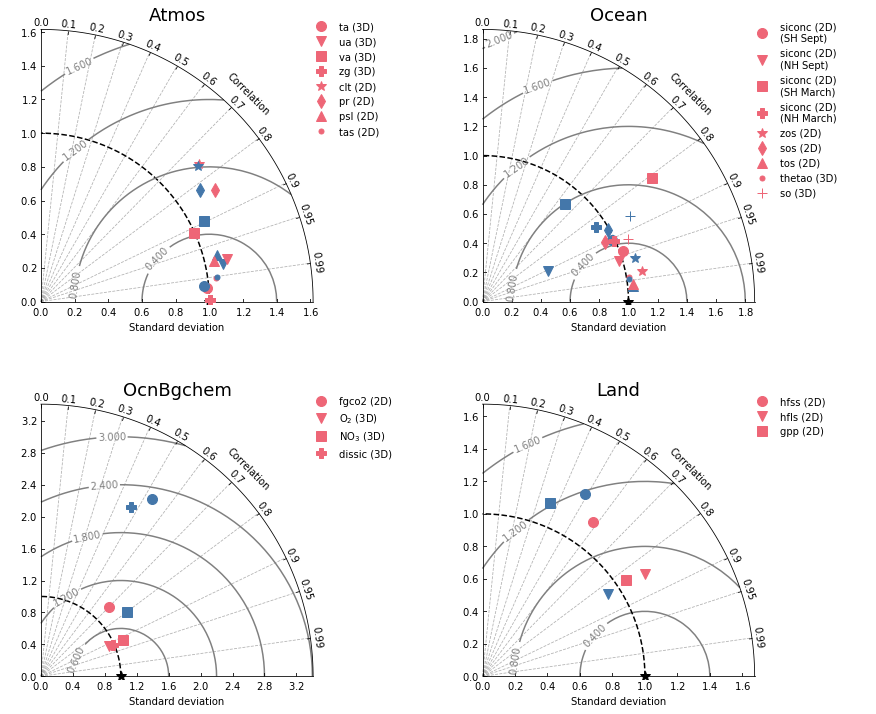

In [4]:
#taylor diagrams 

#get data
conn = sqlite3.connect('stats.db')
c = conn.cursor()

values = {'model1':'CanESM5', 'model2':'CanESM2'}
c.execute(('''SELECT b1.var, b1.model as CanESM5, b2.model as CanESM2, 
                     b1.corrcoeff, b2.corrcoeff, 
                     b1.obs_std,   b2.obs_std,
                     b1.model_std, b2.model_std
              FROM basic_stats b1
                   LEFT JOIN basic_stats b2 
                   ON b1.var = b2.var and b2.model=:model2 and b2.xyzt IN ('TTTF','TTFF')
              WHERE
                   b1.model=:model1
                   and b1.xyzt IN ('TTFF','TTTF')
                   and b1.var IN ('psl','tas','pr','uas','clt','gpp','hfls', 'hfss','fgco2',
                                  'tos','sos','zos','dissic','no3','o2','so','thetao', 'ta','ua','va','zg',
                                  'si_march_nh','si_march_sh','si_sept_nh','si_sept_sh')
              ORDER BY 
                  CASE b1.var
                    WHEN 'ta' THEN 0
                    WHEN 'ua' THEN 1
                    WHEN 'va' THEN 2
                    WHEN 'zg' THEN 3
                    WHEN 'clt' THEN 4
                    WHEN 'pr' THEN 5
                    WHEN 'psl' THEN 6
                    WHEN 'tas' THEN 7
                    WHEN 'uas' THEN 8       
                    WHEN 'so' THEN 15
                    WHEN 'thetao' THEN 14
                    WHEN 'tos' THEN 13
                    WHEN 'sos' THEN 12
                    WHEN 'zos' THEN 11
                    WHEN 'si_march_nh' THEN 10
                    WHEN 'si_march_sh' THEN 9
                    WHEN 'si_sept_nh' THEN 8
                    WHEN 'si_sept_sh' THEN 7
                    WHEN 'dissic' THEN 6
                    WHEN 'no3' THEN 5
                    WHEN 'o2' THEN 4
                    WHEN 'fgco2' THEN 3
                    WHEN 'gpp' THEN 2
                    WHEN 'hfls' THEN 1
                    WHEN 'hfss' THEN 0
                  END
           '''),values) 

data = c.fetchall()
conn.close()



atmos_var_list = ['ta','tas','ua','ua','va','zg','clt','pr','psl']
taylor_atmos_data = []

ocean_var_list = ['so','thetao','tos','sos','zos','si_march_nh','si_march_sh','si_sept_nh','si_sept_sh']
taylor_ocean_data = []

ocnBgchem_var_list = ['dissic','no3','o2','fgco2']
taylor_ocnBgchem_data = []

land_var_list = ['gpp','hfls','hfss']
taylor_land_data = []

m = ['o','v','s','P','*','d','^','.','+']

for row in data:
    var = row[0]
    C5_model = row[1]
    C2_model = row[2]
    C5_corrcoeff = np.float32(row[3])
    C2_corrcoeff = np.float32(row[4])
    C5_obs_std = np.float32(row[5])
    C2_obs_std = np.float32(row[6])
    C5_model_std = np.float32(row[7])
    C2_model_std = np.float32(row[8])

    for var_list, taylor_list in zip([atmos_var_list, ocean_var_list, ocnBgchem_var_list, land_var_list],[taylor_atmos_data, taylor_ocean_data, taylor_ocnBgchem_data, taylor_land_data]):
        
        if var in var_list:

            vardict_atmos_CanESM5 = {
            'name': var_names[var],
            'corrcoef': C5_corrcoeff,
            'std': C5_model_std/C5_obs_std,
            'color': color_dict['CanESM5'],
            'marker': m[int(len(taylor_list)/2)],
            'zorder': 3
            }

            vardict_atmos_CanESM2 = {
            'name': '',
            'corrcoef': C2_corrcoeff,
            'std': C2_model_std/C2_obs_std,
            'color': color_dict['CanESM2'],
            'marker': m[int(len(taylor_list)/2)],
            'zorder': 3
            }

            taylor_list.append(vardict_atmos_CanESM5)
            taylor_list.append(vardict_atmos_CanESM2)

            
#plotting

fig = plt.figure(figsize=(14,12))
cmap=plt.cm.viridis


atmos_dia = taylor.taylor_from_stats(taylor_atmos_data, obs_label='', fig=fig, rect=221, label=None, ax_args=[])
atmos_dia.ax.legend(numpoints=1, ncol=1, loc='upper left', bbox_to_anchor=(0.95,1.05), labelspacing=0.5, frameon=False)
atmos_dia._ax.set_title('Atmos',fontsize=18)

ocean_dia = taylor.taylor_from_stats(taylor_ocean_data, obs_label='', fig=fig, rect=222, label=None, ax_args=[])
ocean_dia.ax.legend(numpoints=1, ncol=1,  loc='upper left', bbox_to_anchor=(0.95,1.05), labelspacing=0.5, frameon=False)
ocean_dia._ax.set_title('Ocean',fontsize=18)

ocnBgchem_dia = taylor.taylor_from_stats(taylor_ocnBgchem_data, obs_label='', fig=fig, rect=223, label=None, ax_args=[])
ocnBgchem_dia.ax.legend(numpoints=1, ncol=1,  loc='upper left', bbox_to_anchor=(0.95,1.05), labelspacing=0.5, frameon=False)
ocnBgchem_dia._ax.set_title('OcnBgchem',fontsize=18)

land_dia = taylor.taylor_from_stats(taylor_land_data, obs_label='', fig=fig, rect=224, label=None, ax_args=[])
land_dia.ax.legend(numpoints=1, ncol=1,  loc='upper left', bbox_to_anchor=(0.95,1.05), labelspacing=0.5, frameon=False)
land_dia._ax.set_title('Land',fontsize=18)

plt.subplots_adjust(wspace=0.3, hspace=0.35)  


fig.savefig('plots/fig-X06_taylor.png', bbox_inches='tight')
#fig.savefig('plots/fig-06_taylor.pdf', bbox_inches='tight')

### SQLite database manipulations

In [5]:
#sqlite database set up
delete_table = False
make_table = False

if delete_table:
    conn = sqlite3.connect('stats.db')
    c = conn.cursor()
    c.execute('DROP TABLE basic_stats')
    conn.commit()
    conn.close() 

if make_table:
    conn = sqlite3.connect('stats.db')
    c = conn.cursor()
    c.execute('''CREATE TABLE basic_stats
                 (var text, model text, obs text, startdate text, enddate text, RMSE real, CRMSE real, corrcoeff real, model_std real, obs_std real, bias real, S_bias real, S_rmse real, xyzt text,   
                 UNIQUE (var, model, startdate, enddate, xyzt) ON CONFLICT REPLACE)''')
    conn.commit()
    conn.close()



In [6]:
#database manipulations

conn = sqlite3.connect('stats.db')
c = conn.cursor()

##print table info
c.execute('PRAGMA table_info(basic_stats)')
pprint(c.fetchall())

##delete from table    
c.execute('DELETE FROM basic_stats WHERE var=:var and model=:model', {'var': 'thetao','model':'CanESM2'})        
conn.commit()

#add coloumn
#c.execute('ALTER TABLE basic_stats ADD S_dist real')
#conn.commit()
         
##select * from table   
results = c.execute('SELECT * FROM basic_stats WHERE var IN ("zg")')
print([description[0] for description in results.description])
i=0
for line in results:
    print(line)          
    i+=1
print(i)
          
conn.close()    

NameError: name 'pprint' is not defined